Stock Price Prediction Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv('/content/WIPRO.csv')
print(data.shape)
print(data.sample(7))


(5306, 15)
            Date Symbol Series  Prev Close     Open     High      Low    Last  \
993   2003-12-17  WIPRO     EQ     1685.75  1660.05  1675.00  1614.00  1658.0   
3524  2014-02-10  WIPRO     EQ      561.65   563.00   569.60   561.10   561.1   
4562  2018-04-27  WIPRO     EQ      281.35   276.40   279.30   274.35   276.1   
685   2002-09-26  WIPRO     EQ     1333.50  1359.00  1365.00  1340.15  1342.0   
3489  2013-12-20  WIPRO     EQ      529.15   534.40   552.70   530.35   550.2   
3286  2013-02-26  WIPRO     EQ      419.10   416.95   420.55   412.85   416.9   
375   2001-07-02  WIPRO     EQ     1405.80  1410.00  1410.00  1315.10  1340.0   

        Close     VWAP   Volume      Turnover   Trades  Deliverable Volume  \
993   1660.65  1659.49   766467  1.271948e+14      NaN            143660.0   
3524   563.20   566.02  1045040  5.915132e+13  24495.0            830998.0   
4562   276.15   276.54  2444786  6.760759e+13  37647.0            964493.0   
685   1345.80  1352.99   508

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                5306 non-null   datetime64[ns]
 1   Symbol              5306 non-null   object        
 2   Series              5306 non-null   object        
 3   Prev Close          5306 non-null   float64       
 4   Open                5306 non-null   float64       
 5   High                5306 non-null   float64       
 6   Low                 5306 non-null   float64       
 7   Last                5306 non-null   float64       
 8   Close               5306 non-null   float64       
 9   VWAP                5306 non-null   float64       
 10  Volume              5306 non-null   int64         
 11  Turnover            5306 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4797 non-null   float64     

In [9]:
data['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5301   2021-04-26
5302   2021-04-27
5303   2021-04-28
5304   2021-04-29
5305   2021-04-30
Name: Date, Length: 5306, dtype: datetime64[ns]

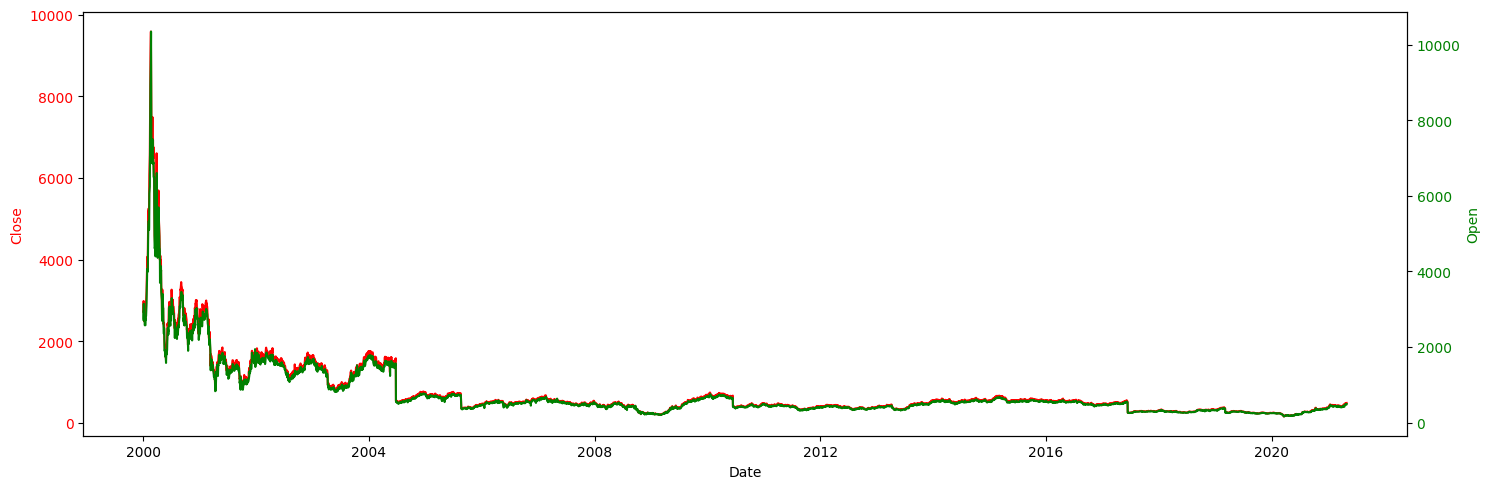

In [14]:
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='red')
ax1.plot(data['Date'], data['Close'], color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Open', color='green')  # we already handled the x-label with ax1
ax2.plot(data['Date'], data['Open'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

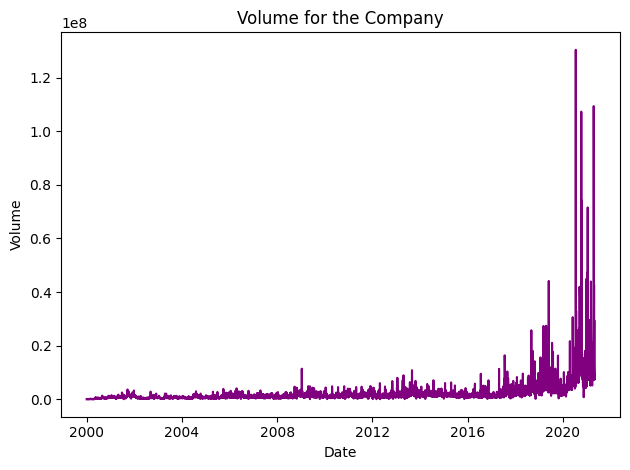

In [15]:
plt.plot(data['Date'], data['Volume'], c='purple')

plt.title(f"Volume for the Company")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

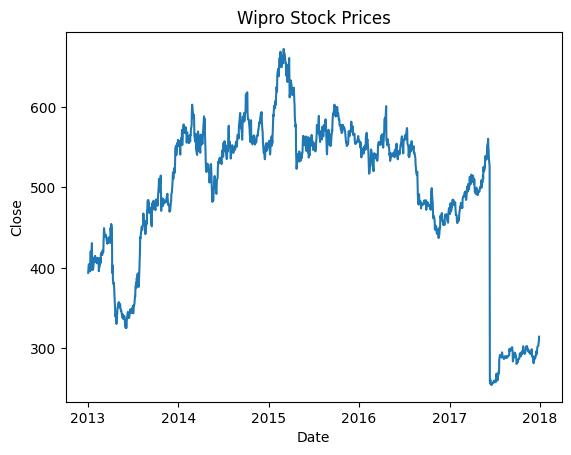

In [23]:
prediction_range = data.loc[(data['Date'] > datetime(2013,1,1))
& (data['Date']<datetime(2018,1,1))]
plt.plot(prediction_range['Date'], prediction_range['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Wipro Stock Prices")
plt.show()


In [17]:
close_data = data.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)
print(dataset.shape)


5041
(5306, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [19]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
model.summary


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7dc310565c30>>

In [20]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)

Epoch 1/10
156/156 [==============================] - 15s 70ms/step - loss: 6.1867e-04
Epoch 2/10
156/156 [==============================] - 11s 68ms/step - loss: 4.0045e-04
Epoch 3/10
156/156 [==============================] - 10s 62ms/step - loss: 2.4314e-04
Epoch 4/10
156/156 [==============================] - 10s 66ms/step - loss: 2.2735e-04
Epoch 5/10
156/156 [==============================] - 11s 70ms/step - loss: 2.3804e-04
Epoch 6/10
156/156 [==============================] - 11s 69ms/step - loss: 2.5079e-04
Epoch 7/10
156/156 [==============================] - 10s 67ms/step - loss: 2.3359e-04
Epoch 8/10
156/156 [==============================] - 10s 63ms/step - loss: 2.1411e-04
Epoch 9/10
156/156 [==============================] - 11s 71ms/step - loss: 1.9590e-04
Epoch 10/10
156/156 [==============================] - 11s 69ms/step - loss: 1.8010e-04


In [24]:

print(scaled_data.shape)

(5306, 1)


In [25]:
scaled_data[training - 60:, :]

array([[0.00948531],
       [0.00980891],
       [0.01006355],
       [0.00911396],
       [0.00934738],
       [0.00941635],
       [0.00908744],
       [0.00899195],
       [0.00885932],
       [0.00916171],
       [0.009045  ],
       [0.00880627],
       [0.00866834],
       [0.00895481],
       [0.00831291],
       [0.00789912],
       [0.00789912],
       [0.00796278],
       [0.00826516],
       [0.00847736],
       [0.0086259 ],
       [0.00865773],
       [0.00833413],
       [0.00837126],
       [0.00871078],
       [0.00863651],
       [0.00854633],
       [0.00864182],
       [0.00866834],
       [0.009045  ],
       [0.00884341],
       [0.00868426],
       [0.00867365],
       [0.00822803],
       [0.0073474 ],
       [0.00627049],
       [0.00620153],
       [0.00650921],
       [0.00705563],
       [0.00714581],
       [0.0064933 ],
       [0.00552249],
       [0.00538456],
       [0.00389916],
       [0.00371879],
       [0.00184613],
       [0.00114057],
       [0.000

In [30]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100
print("MAPE:", mape)

9/9 [==============================] - 0s 19ms/step
MSE: 308.6331744221736
RMSE: 17.567958743752037
MAPE: 4.136471794065785


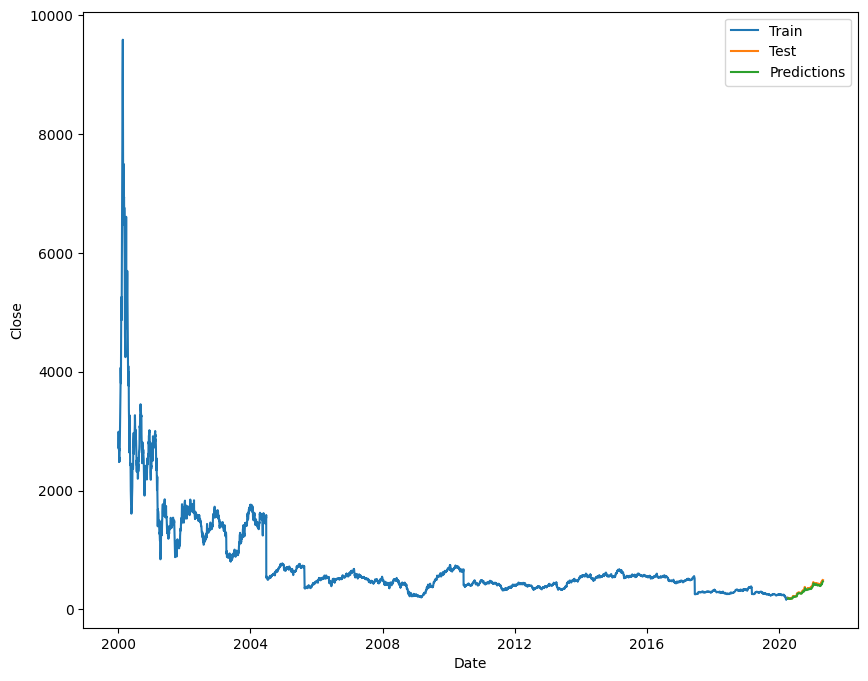

In [36]:
train = data[:training]
test = data[training:]

# Ensure that 'Predictions' is of the same length as the test set
test = test.iloc[:len(predictions)]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(test['Date'], test['Predictions'], label='Predictions')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend()
plt.show()


by: Sandeep rawat